18050311055 Cengizhan Toksarı

In [39]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score



In [40]:
# Loading the iris dataset from scikit
iris = load_iris()

In [41]:
# Placing iris dataset to a pandas dataframe
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


Implementation of FFS.

In [42]:
ar2 = dict()
candidates = []
features = []
last_max = -1
max_ar2 = 0

y = 'target'

knn = KNeighborsClassifier(n_neighbors = 1)

while(True):

  for x in df.drop([y] + candidates, axis=1).columns:

    if len(candidates) == 0:
      features = []
      features.append(x)
    else:
      features = []
      features.append(x)
      features += candidates

    cv_scores = cross_val_score(knn, df[features], df[[y]].values.ravel(), cv=5)
    ar2[x] = np.mean(cv_scores)

    
  max_ar2 =  max(ar2.values())
  max_ar2_key = max(ar2, key=ar2.get)
    
  if max_ar2 > last_max:
    candidates.append(max_ar2_key)
    last_max = max_ar2

    print('step: ' + str(len(candidates)))
    print(candidates)
    print('Mean Cross Validation Score: ' + str(max_ar2))
    print('===============')
  else:
    break

print('\n\n')
print('elminated variables: ')
print(set(df.drop(y, axis=1).columns).difference(candidates))
print('\n\n')
print("selected variables: ")
print(candidates)

step: 1
['petal width (cm)']
Mean Cross Validation Score: 0.9133333333333333
step: 2
['petal width (cm)', 'petal length (cm)']
Mean Cross Validation Score: 0.9666666666666666



elminated variables: 
{'sepal length (cm)', 'sepal width (cm)'}



selected variables: 
['petal width (cm)', 'petal length (cm)']


From this result our algorithm selected petal width and petal length features for our classifier. This means adding sepal length or sepal width features to our model do not provide better K-fold cross validation score with k=5. 

Now to make sure we will manually select and try different combinations to be sure that our code does not give an wrong output.

In [44]:
df2 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

knn = KNeighborsClassifier(n_neighbors = 1)


cv_scores = cross_val_score(knn,df2[['sepal length (cm)','sepal width (cm)']],df['target'],cv=5)
print(np.mean(cv_scores))

0.7333333333333332


In [45]:
cv_scores = cross_val_score(knn,df2[['petal length (cm)','sepal width (cm)']],df['target'],cv=5)
print(np.mean(cv_scores))

0.9


In [46]:
cv_scores = cross_val_score(knn,df2[['petal length (cm)','sepal width (cm)','petal width (cm)']],df['target'],cv=5)
print(np.mean(cv_scores))

0.9533333333333334


In [47]:
cv_scores = cross_val_score(knn,df2[['petal width (cm)']],df[['target']].values.ravel(),cv=5)
print(np.mean(cv_scores))

0.9133333333333333


Question 3

In [52]:
df2 = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
columns= iris['feature_names']
knn = KNeighborsClassifier(n_neighbors = 1)
list_score=[]


for i in columns:
  for j in columns:
    if i!=j :
        cv_scores = cross_val_score(knn,df2[[i,j]],df['target'],cv=5)
        list_score.append(np.mean(cv_scores))
        print(f"features1 :{i} , features2: {j} score :{np.mean(cv_scores)}")



features1 :sepal length (cm) , features2: sepal width (cm) score :0.7333333333333332
features1 :sepal length (cm) , features2: petal length (cm) score :0.9133333333333333
features1 :sepal length (cm) , features2: petal width (cm) score :0.9199999999999999
features1 :sepal width (cm) , features2: sepal length (cm) score :0.7333333333333332
features1 :sepal width (cm) , features2: petal length (cm) score :0.9
features1 :sepal width (cm) , features2: petal width (cm) score :0.9400000000000001
features1 :petal length (cm) , features2: sepal length (cm) score :0.9133333333333333
features1 :petal length (cm) , features2: sepal width (cm) score :0.9
features1 :petal length (cm) , features2: petal width (cm) score :0.9666666666666666
features1 :petal width (cm) , features2: sepal length (cm) score :0.9199999999999999
features1 :petal width (cm) , features2: sepal width (cm) score :0.9400000000000001
features1 :petal width (cm) , features2: petal length (cm) score :0.9666666666666666


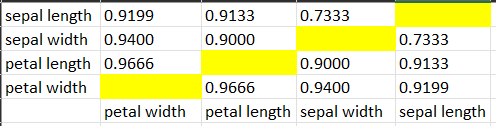

Question 4 

For this example in first step we would have to manually calculate 4 features and select the best,
and then in second step i would have to to manually make 3 calculations and so on.

Maybe for a dataset with 4 features this can be done but for a larger dataset it would be a very big waste of time. 

Also making any changes would mean doing everything from scratch, For example for finding best accurate model we used K-Fold cross validation, and we can easily change this method now.

FFS vs Bruteforce

In FFS we can train at most 4+3+2+1 = 10 models but we can stop before going through each step with FFS. In this homework FFS stopped at step3 which means 9 calculations.

With bruteforce we have to calculate all posibilities and then compare. Which means waste of computation time and resources.

In a dataset with around 10 features this difference can go up to 30 40 times of fitting and evalutiang the model unnecessarily, and creates a meaningful difference.